<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/MachineLearningforBeginners_Part_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a hands-on learning approach where I will not be overwhelming you with standalone concepts of mathsor visualization libraries or numpy.We will be simply using them as and when the need is there and that will help you to grasp the actual implementation with sound *concepts*

# Machine Learning - **Topics**

1. Introduction - ML, Types,SL,UL, Regression , Classification

What will be the approach to learn

Maths ?

Python ?

2. Weight , Bias , Feature(Slope, intercept, target and independent variable)

3. Linear Regression Problem - Supervised Learning Regression Problem

4. Error - Predicted Vs Tested Value

5. A little maths on derivative

7. Gradient Descent and Cost Function

8. Logistic Regression - Solving Supervised Learning Classification problem

9. Performance Evaluation




# Machine Learning - Introduction

# Features, Weights and Bias


Let's solve a basic maths problem:
suppose you go to supermarket one day and find the melons of different sizes and weights

melon_data = [(1, 2), (2, 4), (3, 6),(4, 8), (5, 10]

melon_price=2*melon_wt

let's say  you need to pay parking of the place as $2 weather you buy or not


melon_price=2*melon_wt+2

If I ask you the price of melon weighted 20 kg, you will substitute in equation:

melon_price_20=2*20+2

We can also draw a graph with and without parking .We can predict value from the line.








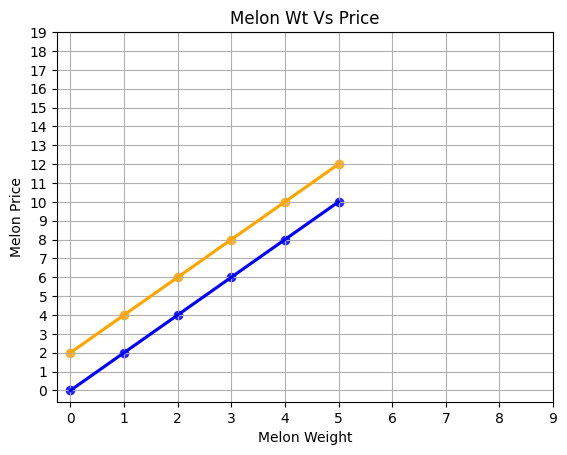

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample list of tuples containing coordinates
coordinates1 = [(0,0),(1, 2), (2, 4), (3, 6), (4, 8), (5, 10)]
#with bias
coordinates2 = [(0,2),(1, 4), (2, 6), (3, 8), (4, 10), (5, 12)]


# Extract x and y coordinates from the list of tuples
x_values_1 = [coord[0] for coord in coordinates1]
y_values_1 = [coord[1] for coord in coordinates1]

# Extract x and y coordinates from the list of tuples
x_values_2 = [coord[0] for coord in coordinates2]
y_values_2 = [coord[1] for coord in coordinates2]

# Plot the points
sns.regplot(x=x_values_1,y= y_values_1,color='blue')

# Plot the points
sns.regplot(x=x_values_2,y= y_values_2,color='orange')


# Add labels and title
# Customize x-ticks to display integers
plt.xticks(range(min(x_values_1), max(x_values_1)+5))
plt.yticks(range(min(y_values_1), max(y_values_1)+10))

# Add labels and title
plt.xlabel('Melon Weight')
plt.ylabel('Melon Price')
plt.title('Melon Wt Vs Price')
# Show the plot
plt.grid(True)
plt.show()

#annotate line with eqaution while describing

[Inspiration: Towards Data Science](https://towardsdatascience.com/machine-learning-simple-linear-regression-with-python-f04ecfdadc13)

Linear equation in general be written as

y=mx+b

m-> slope or weight

b-> bias

x, y are variables are

when we are using it for machine learning, y is dependent variable(dependent on x in this case like melon price is dependendent on melon weight) or predicted variable or label or target variable or the variable
x is independent variable or feature


This can also be interpretedvas simple linear regression model where we can predic value of with help of value of x



**When life is not that straightforward**

Suppose we want to predict the salary of an employee based on their years of experience. In this case, the independent variable is “years of experience” and the dependent variable is “salary”. We have a dataset that contains the salaries of 35 employees along with their years of experience.

Now you are a hiring manager and you have a candidate 7.7 years of experience, what salary you could offer based on dataset provided

 Our task is to build a model that can predict the salary of a new employee based on their years of experience.



[Salary Data Set](https://www.kaggle.com/code/codebreaker619/employee-salary-prediction-using-linear-regression/input)






In [218]:
import pandas as pd

# Convert dictionary to DataFrame
df = pd.read_csv("Salary.csv")

# Display the DataFrame
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


Based on our observation, we can guess that the salary range of 5 Years Experience should be in the particular range. Of course, we can offer to our candidate any number in that red range. But how to pick the best number for him? It’s time to use Machine Learning to predict the best salary for our candidate.

*The goal of creating a model is to choose parameters, or theta values, so that y^ is close to y for the training data, x and y. *

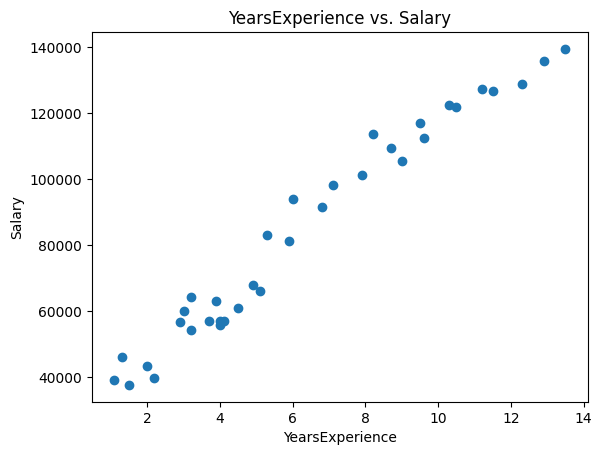

In [220]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df["YearsExperience"], df["Salary"])

#set labels
plt.title('YearsExperience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

# Set y-axis tick formatter to disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

#show plot
plt.show()

In [221]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st
#input features need to be in 2-D shappe
X.shape




(35, 1)

In [222]:
#training the model - we will talk about what is actually training the model later
model.fit(X, y)


LinearRegression()

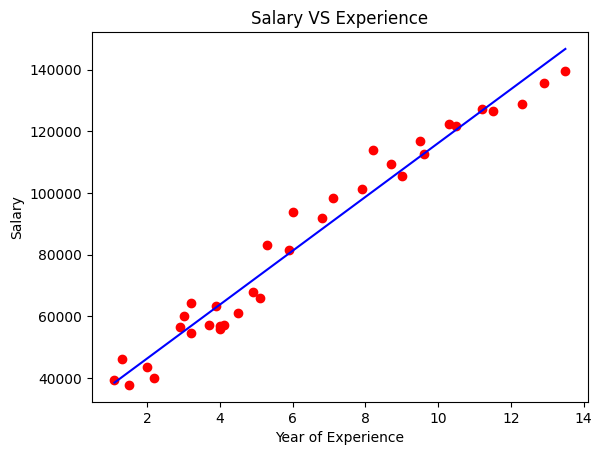

In [223]:
# Visualizing the Training set results

plt.scatter(X, y, color='red')
plt.plot(X, model.predict(X), color='blue')
plt.title('Salary VS Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [224]:
# Extract the coefficients
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

print("Slope (m):", m)
print("Intercept (b):", b)

Slope (m): 8731.941047062497
Intercept (b): 28859.52619453144


In [225]:
import numpy as np
X_pred = np.array([[7.7]])

# Make predictions
prediction = model.predict(X_pred)
prediction
#check value by replacing y=mx+b using above slope and intercept

array([96095.47225691])

But should we blindly trust this predictive model .Ofcourse we need a validation that this is the "Best fit Line" with given slope and intercept.

We feel the need of a test data where we know actual values of target feature and then after prediction from given test inputs , we compare the values.

So from where we get the test data.

Earlier we used whole of the dataset to train the model and we are not left with any test data.

This time we will divide given data into 2 parts - bigger chunk we will keep for "training the model" which will give us "best fit line" and smaller chunk we can keep as test data to validate how close are the actual values to predicted values

Though you might have got intution by now what is "training the model" and what is "best fit line", we will talk about it in details in upcoming parts.

So let's for now divide our datset into train and test data .How do we do that ? By using train_test split module from sklearn library.so let's do that and update previous code




In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
X = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st
#input features need to be in 2-D shappe
X.shape

#split the dataset into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape)
print(X_test.shape)

# total records -35-->0.2 of 35=7 is test data

(28, 1)
(7, 1)


In [227]:
#now let's train the model on train data
model.fit(X_train,y_train)

LinearRegression()

In [228]:
#let's predict the values by providing input features of test data
y_pred=model.predict(X_test)
#we have 7 values for 7 records-->these are y_pred
y_pred

array([145190.21247692, 150708.3951762 , 132314.45284525,  53220.50082218,
        38505.34695742,  64256.86622075,  80811.4143186 ])

In [229]:
#let's pick first actual value of y and compare with predicted value
y_test[0],y_pred[0],y_test[0]- y_pred[0]



(135675, 145190.21247691818, -9515.212476918183)

In [230]:
# let's compare all the values of y_test actual and predicted
y_test

array([135675, 139465, 126756,  56642,  46205,  57081,  81363])

Little bit on metrices -addition and subtraction operation here

In [231]:
# Calculate the differences
# since these are numpy arrays we can do direct calculation

differences = y_pred - y_test

# Print the differences
for i, diff in enumerate(differences):
    print("Difference for index {}: {}".format(i, diff))

Difference for index 0: 9515.212476918183
Difference for index 1: 11243.395176202466
Difference for index 2: 5558.452845254855
Difference for index 3: -3421.4991778199474
Difference for index 4: -7699.653042578051
Difference for index 5: 7175.866220748627
Difference for index 6: -551.585681398501


Ok.so now we know how close or far actual values are from predicted value but still don't know if this is the best prediction so we just have to trust here until we know what is best fit line and gradient which we will be doing in sooner lectures but let's park it for now

what we can do for now is we can come up with overall deviation or error this model is having.subsequently we will be talking about mean absolute error,mean squared error and cost function so let's stay tuned

To understand these we will be taking very small hypothetical dataset of ... and then we will apply same in our salary dataset code.

In this example we will take a subset of 10 datapoints from height and weight data from [here](https://homework.study.com/explanation/a-sample-of-10-adult-men-gave-the-following-data-on-their-heights-and-weights-height-inches-x-62-62-63-65-66-67-68-68-70-72-weight-pounds-y-120-140-130-150-142-130-135-175-149-168-a-predict-the-weight-of-a-man-whose-height-is-60-inches-b-find-a.html)

Height (inches) X 62 62 63 65 66 67 68 68 70 72

Weight (pounds) Y 120 140 130 150 142 130 135 175 149 168



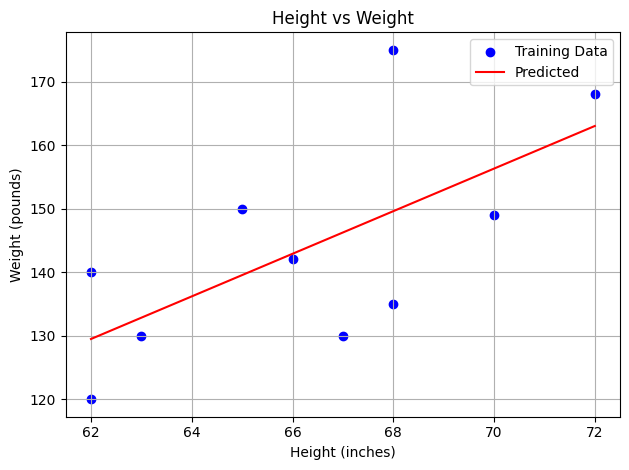

[149 140]
slope : 3.3525954946131242 , intercept: -78.37708129285011


In [266]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([62, 62, 63, 65, 66, 67, 68, 68, 70, 72]).reshape(-1, 1)  # Height in inches
y = np.array([120, 140, 130, 150, 142, 130, 135, 175, 149, 168])  # Weight in pounds

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X, y)

# Plot the training data points
plt.scatter(X, y, color='blue', label='Training Data')

# # Plot the testing data points
# plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Plot the best fit line using the training data
plt.plot(X, model.predict(X), color='red', label='Predicted')

# Add labels and legend
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
print(y_test)
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept
print(f"slope : {m} , intercept: {b}")

# Loss Function
# Cost Function for regression problem
## MAE and MSE

We will talk about loss function and cost function for classification problem when we arrive at one.A commonly used loss function for classification is the cross-entropy loss.We will park this for now and continue with linear regression.

 A cost function is a measure of how well a machine learning model performs by quantifying the difference between predicted and actual outputs. Its goal is to be minimized by adjusting the model’s parameters during training


Calculate Error - MAE

Error for data point 1-

```
y-actual - y-predicted=140-125=15

# This is formatted as code
```
Error for data point 2-

```
y-actual - y-predicted=150-160=-10

# This is formatted as code
```

For a given dataset, we evaluate linear regression model using MAE or MSE

**MAE - Mean Absolute Value**

MAE is calculated by taking the average of the absolute differences between the predicted values and the actual values.


In this case:


```

MAE = (|15|+|-10|)/2
```



**Mean Squared Error (MSE)**

MSE measures the average squared difference between the predicted values and the actual values.

In this case:


```

MSE = ((15)^2+(-10)^2)/2
```

**MAE Vs MSE**

Let's look at the mathmatical notion of both the values-rather I would say drive with me

**MAE**
It treats all errors equally regardless of their size, providing a more balanced view of the model's performance.

It is more robust to outliers compared to MSE

MAE is easier to interpret since it represents the average magnitude of errors in the same units as the target variable.

**MSE**

It penalizes larger errors more than smaller ones because it squares the errors.

MSE is more sensitive to outliers compared to MAE because larger errors contribute more to the overall error.

MSE is not as interpretable as MAE since it represents the average squared error, which may not be in the same units as the target variable.

MSE is useful when you want to penalize larger errors more heavily, such as in cases where small errors are acceptable but large errors are not

Now let's evaluate our model using Python by finding MAE and MSE



In [233]:
# Let's find MAE and MSE using python

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Given data
X = np.array([62, 62, 63, 65, 66, 67, 68, 68, 70, 72]).reshape(-1, 1)  # Height in inches
y = np.array([120, 140, 130, 150, 142, 130, 135, 175, 149, 168])  # Weight in pounds

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model using only the training data
model = LinearRegression()
model.fit(X_train, y_train)

# # Plot the training data points
# plt.scatter(X_train, y_train, color='blue', label='Training Data')

# # Plot the testing data points
# plt.scatter(X_test, y_test, color='green', label='Testing Data')

# # Plot the best fit line using the training data
# plt.plot(X_train, model.predict(X_train), color='red', label='Best Fit Line')

# # Add labels and legend
# plt.xlabel('Height (inches)')
# plt.ylabel('Weight (pounds)')
# plt.title('Height vs Weight')
# plt.legend()

# # Show plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()
print(y_test)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

[149 140]
Mean Absolute Error (MAE): 13.059928443649369
Mean Squared Error (MSE): 176.30371286574223


**Assignment** - Find MAE and MSE for linear regression model created using salary dataset

> Indented block

> Indented block





End Goal of Machine Learning Model is to give equation which gives minimized cost function.

#  Gradient Descent and Best Fit Line

Let's take some some random data:

x = [1, 1, 2, 3, 4, 3, 4, 6, 4]

y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]

Let's plot it on scatter plot to indicate how y is dependent on x

Text(0.5, 1.0, 'y vs x')

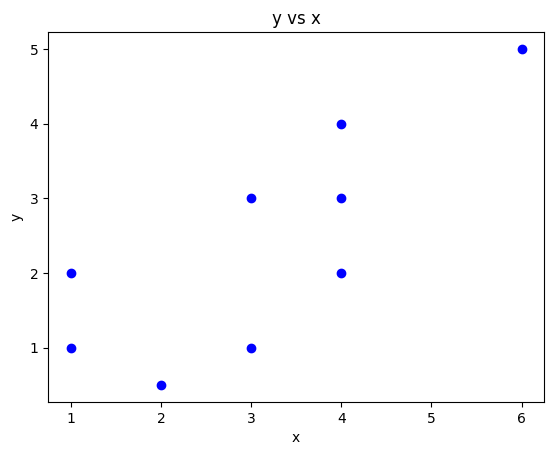

In [235]:
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]

y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]

# Plot the training data points
plt.scatter(x, y, color='blue')

# # Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')


Here I don't know the relation between x and y .Let's try to find manually the line which will try to fit most of the data points by choosing random values of weights and bias

y=mx+c

if we take m=0(implies there is no dependency of y on x), y=c, let's say c=3





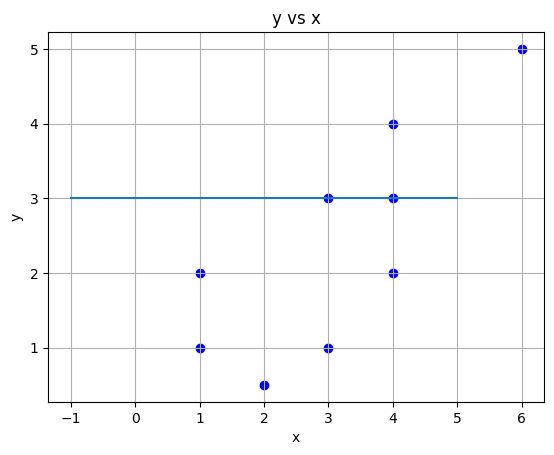

In [236]:
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]

y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]

# Plot the training data points
plt.scatter(x, y, color='blue')

# # Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.grid(True)

plt.plot([-1,5], [3, 3], label=f'y = 0.x + 3')


Let's calculate cost function MSE in this case

y_actual = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
y_pred=[1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5]

In [237]:
# to do vector operation we will make use of numpy
# we can also do without numpy using math but that would be long way
import numpy as np

y_actual = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
y_pred = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]

# Convert lists to numpy arrays for ease of calculation
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

# Calculate mean squared error
mse = np.mean((y_actual - y_pred) ** 2)

print("Mean Squared Error (MSE) for m=0 and c=3:", round(mse,2))

Mean Squared Error (MSE) for m=0 and c=3: 2.78


Similarly let's give a try to another weight (slope) and another intercep(bias) and find cost function value

let's take m=0.5 and b=1.5 so our equation representing relation betweenn y and x->

y=0.5x+1.5

let's find any two y's for any given x value and plot a line




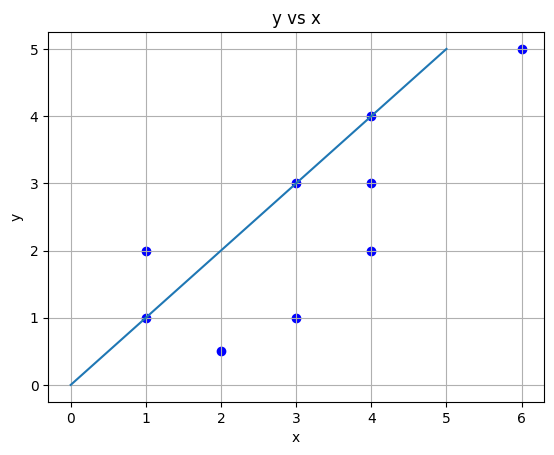

In [238]:
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]

y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]


# Plot the training data points
plt.scatter(x, y, color='blue')

# # Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.grid(True)

# Define slope and intercept
m = 1
b = 0

# Define two points on the line
x1 = 0
y1 = m * x1 + b

x2 = 7
y2 = m * x2 + b
# Generate x values
x_values = np.linspace(0,5, 10)

# Calculate corresponding y values using slope-intercept form (y = mx + b)
y_values = m * x_values + b

# Plot the line
plt.plot(x_values, y_values, label=f'y = {m}x + {b}')


# plt.plot([x1,y1], [x2, y2], label=f'y = 0.5.x + 1.5')

In [239]:
#cost function -mse in this case
# to do vector operation we will make use of numpy
# we can also do without numpy using math but that would be long way
import numpy as np

y_actual = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
y_pred =  [1, 1, 2, 3, 4, 3, 4, 6, 4]


# Convert lists to numpy arrays for ease of calculation
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

# Calculate mean squared error
mse = np.mean((y_actual - y_pred) ** 2)

print("Mean Squared Error (MSE) for m=1 and b=0:", round(mse,2))

Mean Squared Error (MSE) for m=1 and b=0: 1.47


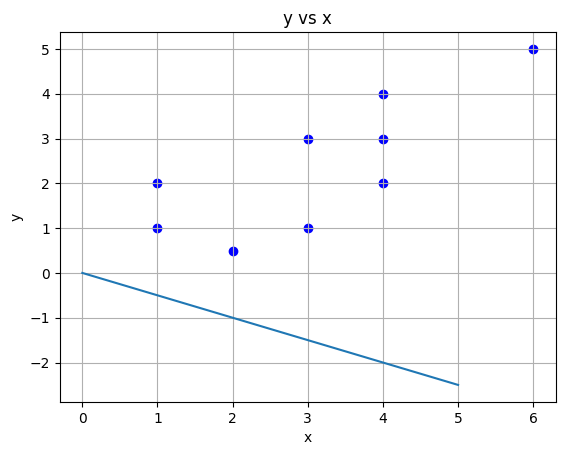

In [240]:
# Let's plot more case

x = [1, 1, 2, 3, 4, 3, 4, 6, 4]

y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]


# Plot the training data points
plt.scatter(x, y, color='blue')

# # Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.grid(True)

# Define slope and intercept
m = -0.5
b = 0

# Define two points on the line
x1 = 0
y1 = m * x1 + b

x2 = 7
y2 = m * x2 + b
# Generate x values
x_values = np.linspace(0,5, 10)

# Calculate corresponding y values using slope-intercept form (y = mx + b)
y_values = m * x_values + b

# Plot the line
plt.plot(x_values, y_values, label=f'y = {m}x + {b}')

In [241]:
#cost function -mse in this case
# to do vector operation we will make use of numpy
# we can also do without numpy using math but that would be long way
import numpy as np

x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
x = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
# Calculate y_pred
y_pred = -0.5*x
# Convert lists to numpy arrays for ease of calculation
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

# Calculate mean squared error
mse = np.mean((y_actual - y_pred) ** 2)

print("Mean Squared Error (MSE) for m=1 and b=0:", round(mse,2))

Mean Squared Error (MSE) for m=1 and b=0: 19.81


In [242]:
#cost function -mse in this case
# to do vector operation we will make use of numpy
# we can also do without numpy using math but that would be long way
import numpy as np

x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
x = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
# Calculate y_pred
y_pred = 1.5*x
# Convert lists to numpy arrays for ease of calculation
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

# Calculate mean squared error
mse = np.mean((y_actual - y_pred) ** 2)
print("Mean Squared Error (MSE) for m=1 and b=0:", round(mse,2))


Mean Squared Error (MSE) for m=1 and b=0: 7.36


In [243]:
#cost function -mse in this case
# to do vector operation we will make use of numpy
# we can also do without numpy using math but that would be long way
import numpy as np

x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
x = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
# Calculate y_pred
y_pred = 0.5*x
# Convert lists to numpy arrays for ease of calculation
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

# Calculate mean squared error
mse = np.mean((y_actual - y_pred) ** 2)
print("Mean Squared Error (MSE) for m=1 and b=0:", round(mse,2))

Mean Squared Error (MSE) for m=1 and b=0: 1.58


In [244]:
#cost function -mse in this case
# to do vector operation we will make use of numpy
# we can also do without numpy using math but that would be long way
import numpy as np

x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
x = np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
# Calculate y_pred
y_pred = 2*x
# Convert lists to numpy arrays for ease of calculation
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

# Calculate mean squared error
mse = np.mean((y_actual - y_pred) ** 2)
print("Mean Squared Error (MSE) for m=1 and b=0:", round(mse,2))

Mean Squared Error (MSE) for m=1 and b=0: 19.25


So here we note that with different values of weight and bias, we have different cost function.Here we are assuming linear relation only.Let's draw a graph between cost function -mse(on y-axis) and value of weight(on x-axis) assuming bias as 0.

y_mse=[2.78,1.47,19.81]

x_weight=[0,1,-0.5]

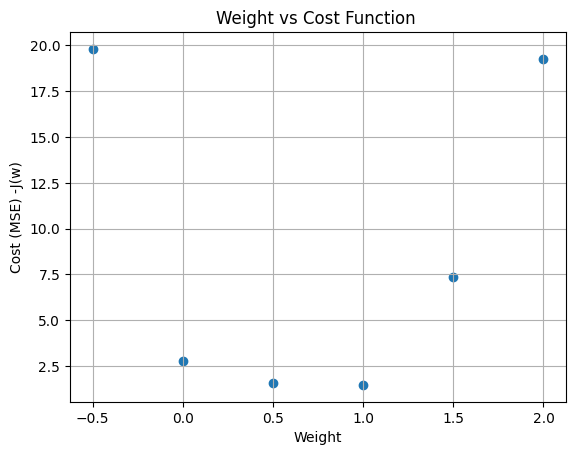

In [245]:


# Provided values
y_mse = [2.78, 1.47, 19.81,7.36,1.58,19.25]
x_weight = [0, 1, -0.5,1.5,0.5,2]

# Plotting the gradient descent
plt.scatter(x_weight, y_mse, marker='o', linestyle='-')

plt.title('Weight vs Cost Function ')
plt.xlabel('Weight')
plt.ylabel('Cost (MSE) -J(w)')
plt.grid(True)
plt.show()

We minimized J(ϴ)(cost function) by trial and error above — just trying lots of values and visually inspecting the resulting graph. There must be a better way? Queue gradient descent. Gradient Descent is a general function for minimizing a function, in this case the Mean Squared Error cost function.

Gradient Descent basically just does what we were doing by hand — change the theta values, or parameters, bit by bit, until we hopefully arrived a minimum.

It does it in algorithmic way unlike us where we are randomly choosing any values of m.It does this by choosing parameter - learning rate(alpha) and a partial derivative of costfunction wrt to weight m

Let's have a closer look on gradient descent algorithm


For multilinear regression problem-y= m1x1+m2x2+m3x3+b where x1, x2,x3 are multiple features


# Encoding Categorical Variables

Let's take a modified Salary dataset - Salary1.csv .

This time we have 2 features one is years of experience and the other is education level - graduate , master, phd .Target variable salary is a function of both of these features and we need to come up with model which could predict salary when we input year of experience and education level

let's start by loading and exploring data

In [246]:
df=pd.read_csv('Salary1.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


for now let's consider only education level and Year of Experience are the only features which we need to consider as idependent features on which target variable is dependent so we will drop other features for now

In [248]:
df=df[["Education Level","Years of Experience","Salary"]]
df.head()

,Education Level,Years of Experience,Salary
0,Bachelor's,5.0,90000.0
1,Master's,3.0,65000.0
2,PhD,15.0,150000.0
3,Bachelor's,7.0,60000.0
4,Master's,20.0,200000.0


Let's drop any empty records as we cannot pass null values to ML algo for reasons like incorrect prediction or long time to converge

In [249]:
df=df.dropna()
df.isnull().sum()

Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

In [250]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

once the model is created we expect equation of form y=m1x1+m2x2+c as we are using a linear regression model .ML model will give us appropriate value of m1 , m2 and c .We will be able to finally feed any value of x1, x2 to get predicted salary


We know behind the scenes we have graient descent algo which will be using convergence algo to arrive at appropriate m1 and m2.We also know that gradient descent algo only works with numerical values to come up with various cost function but the cahllenge here is one of our feature is categorical feature with limited string values.To address this challenge we will be using encoding of categorical feature that is conversion to some numerical value which indicates the presence of particular string value

x1->year of experience is already a numerical value
x2-> Education Level--> Needs to be Numerically encoded to indicate - one of the values -"Bachelor's", "Master's", 'PhD'

Let's see different ways of encoding a categorical variable

## Numerical Encoding

Assigning one integer to each category of the feature for example:

"Bachelor's" -1
"Master's" -2
 'PhD'-3

 We can do this by simple python code like this





In [251]:
# Define the mapping dictionary
education_level_mapping = {
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3
}
df_copy=df.copy()
# Update 'Education Level' column with numerical values using map function
df_copy['Education Level_Num'] = df_copy['Education Level'].map(education_level_mapping)
df_copy.head()

,Education Level,Years of Experience,Salary,Education Level_Num
0,Bachelor's,5.0,90000.0,1
1,Master's,3.0,65000.0,2
2,PhD,15.0,150000.0,3
3,Bachelor's,7.0,60000.0,1
4,Master's,20.0,200000.0,2


Though ordering works here due to different levels(ordinal nature of categorical variable education level, other example customer satisfaction survey at scale of 1 to 10), this approach fails when there is no real ordering between different values (nominal categorical variables)like Gender variable or color . You feed this to model it will work on the basis of magnitude of number and automatically gives preference to value with higher magnitude(in case of gender if we assign 1 to female , 2 to male - we are doing gender biasing)

## One Hot Encoding and Dummy Variable
Next we can do is to create feature for each value of categorical variable(called dummy variables) and mark the record with 1 if that feature is present else mark with 0 .This technique is called one hot encoding .Let's see how we can do that

Later on in our practice projects , we will be using sklearn preprocessing module

In [252]:
# Perform one-hot encoding
df_dummy=pd.get_dummies(df['Education Level'])
df_dummy.head()

,Bachelor's,Master's,PhD
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


In [253]:
# conact with original df
merged_df=pd.concat([df, df_dummy],axis="columns")
merged_df.head()

,Education Level,Years of Experience,Salary,Bachelor's,Master's,PhD
0,Bachelor's,5.0,90000.0,1,0,0
1,Master's,3.0,65000.0,0,1,0
2,PhD,15.0,150000.0,0,0,1
3,Bachelor's,7.0,60000.0,1,0,0
4,Master's,20.0,200000.0,0,1,0


In [254]:
# We can drop original column as its not needed
# merged_df=merged_df.drop(["Education Level"],axis=1)
# merged_df.head()

### Multicolinearity

The **dummy variable trap** is a scenario in which two or more variables in a regression model are highly correlated or perfectly collinear. This occurs when one categorical variable can be accurately predicted from the others. In the context of one-hot encoding, the dummy variable trap specifically refers to the situation where two or more dummy variables are perfectly correlated.
The other example could be 2 features such as lenght of square and area of square

So we need to drop one dummy variable here as we can know third value by knowing 2 values




In [255]:
final_df=merged_df.drop(["Education Level","PhD"],axis=1)
final_df.head()

,Years of Experience,Salary,Bachelor's,Master's
0,5.0,90000.0,1,0
1,3.0,65000.0,0,1
2,15.0,150000.0,0,0
3,7.0,60000.0,1,0
4,20.0,200000.0,0,1


In [263]:
##Let's create a linear regression model using sklearn like we did before

from sklearn.linear_model import LinearRegression
model=LinearRegression()

# Separate Features -X and Target Variable -y
#we can use drop Salary also here
X=final_df[["Bachelor's","Master's","Years of Experience"]]
y=final_df[['Salary']]
X.head()


,Bachelor's,Master's,Years of Experience
0,1,0,5.0
1,0,1,3.0
2,0,0,15.0
3,1,0,7.0
4,0,1,20.0


In [274]:
X=final_df.drop(['Salary'],axis=1)
X

,Years of Experience,Bachelor's,Master's
0,5.0,1,0
1,3.0,0,1
2,15.0,0,0
3,7.0,1,0
4,20.0,0,1
...,...,...,...
370,8.0,1,0
371,19.0,0,1
372,2.0,1,0
373,7.0,1,0


In [275]:
y=final_df.Salary


In [276]:
#train the model
model.fit(X,y)


LinearRegression()

In [281]:
#predict the value-supply X as per trained order of X
model.predict([[5,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62963.97110698])

In [282]:
model.coef_

array([  5996.41423845, -22804.61853676,  -6330.31329928])

In [283]:
#accuracy
model.score(X,y)

0.8897099187072866